In [1]:
import arviz as az
import bambi as bmb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
toy_data = pd.DataFrame(
    {
        "region": ["West"] * 250 + ["East"] * 100, 
        "state": ["CA"] * 150 + ["NV"] * 100 + ["NY"] * 100,
        "county": ["Los Angeles"] * 100 + ["San Diego"] * 30 + ["Orange"] * 20 + ["Clark"] * 50 + ["Washoe"] * 50 + ["Kings"] * 50 + ["Queens"] * 50,
        "y": (
            list(2 + 0.1 * np.random.randn(100))
            + list(2.5 + 0.1 * np.random.randn(30))
            + list(3 + 0.1 * np.random.randn(20))
            + list(5 + 0.1 * np.random.randn(50))
            + list(5.5 + 0.1 * np.random.randn(50))
            + list(8 + 0.1 * np.random.randn(50))
            + list(8.5 + 0.1 * np.random.randn(50))
        )
    }
)


In [3]:
intercept_prior = bmb.Prior("Normal", mu=0, sigma=1)
common_prior = bmb.Prior("Normal", mu=0, sigma=2)
group_specific_sd = bmb.Prior("HalfNormal", sigma=0.1)
group_specific_prior = bmb.Prior("Normal", mu=0, sigma=group_specific_sd)

sigma_prior = bmb.Prior("HalfNormal", sigma=0.5)

priors = {
    "Intercept": intercept_prior, 
    "common": common_prior,
    "group_specific": group_specific_prior, 
    "sigma": sigma_prior
}

model_bmb = bmb.Model("y ~ (1|state) + (1|county)", toy_data, priors=priors)
model_bmb

Formula: y ~ (1|state) + (1|county)
Family name: Gaussian
Link: identity
Observations: 350
Priors:
  Common-level effects
    Intercept ~ Normal(mu: 0, sigma: 1)

  Group-level effects
    1|state ~ Normal(mu: 0, sigma: HalfNormal(sigma: 0.1))
    1|county ~ Normal(mu: 0, sigma: HalfNormal(sigma: 0.1))

  Auxiliary parameters
    sigma ~ HalfNormal(sigma: 0.5)

Maybe very frew groups for group-specific effect?

In [4]:
idata = model_bmb.fit(target_accept=0.9)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [y_sigma, 1|county_offset, 1|county_sigma, 1|state_offset, 1|state_sigma, Intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 93 seconds.


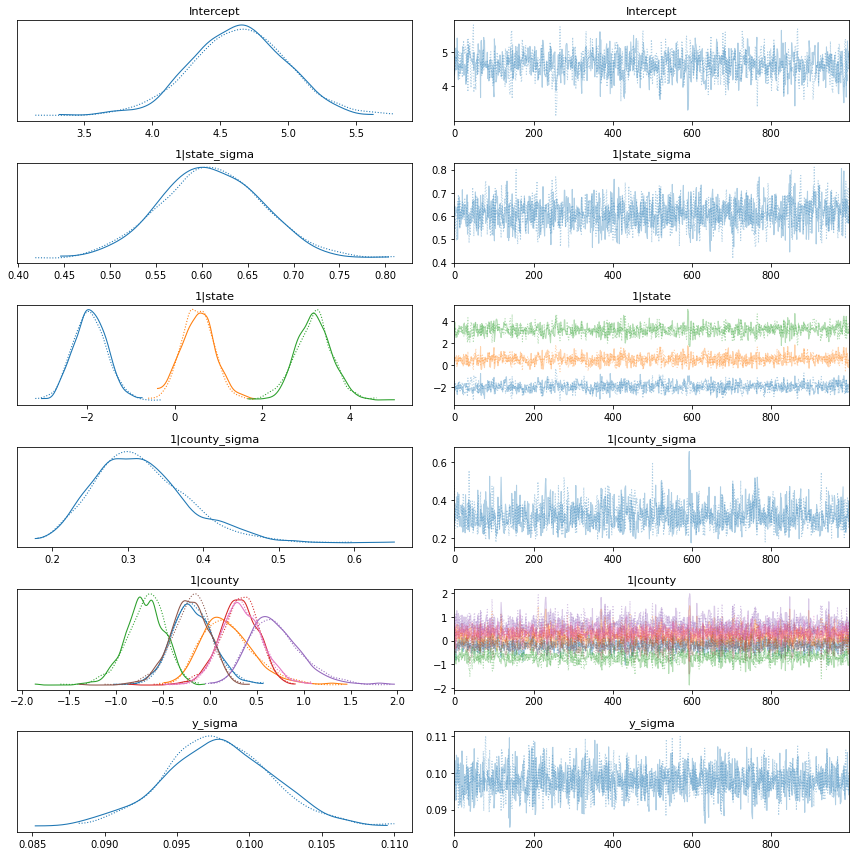

In [5]:
az.plot_trace(idata, backend_kwargs={"tight_layout":True})
fig = plt.gcf()
fig.set_facecolor("w")
#fig.savefig("posterior.png", dpi=300)

In [6]:
toy_data = pd.DataFrame(
    {
        "state": ["CA"] * 15 + ["NV"] * 10 + ["NY"] * 10,
        "county":["Los Angeles"] * 10 + ["San Diego"] * 3 + ["Orange"] * 2 + ["Clark"] * 5 + ["Washoe"] * 5 + ["Kings"] * 5 + ["Queens"] * 5,
        "y": (
            list(2 + 0.1 * np.random.randn(10))
            + list(2.5 + 0.1 * np.random.randn(3))
            + list(3 + 0.1 * np.random.randn(2))
            + list(5 + 0.1 * np.random.randn(5))
            + list(5.5 + 0.1 * np.random.randn(5))
            + list(8 + 0.1 * np.random.randn(5))
            + list(8.5 + 0.1 * np.random.randn(5))
        )
    }
)

In [7]:
intercept_prior = bmb.Prior("Normal", mu=0, sigma=1)
common_prior = bmb.Prior("Normal", mu=0, sigma=2)
group_specific_sd = bmb.Prior("HalfNormal", sigma=0.1)
group_specific_prior = bmb.Prior("Normal", mu=0, sigma=group_specific_sd)

sigma_prior = bmb.Prior("HalfNormal", sigma=0.5)

priors = {
    "Intercept": intercept_prior, 
    "common": common_prior,
    "group_specific": group_specific_prior, 
    "sigma": sigma_prior
}

model_bmb = bmb.Model("y ~ state + county", toy_data, priors=priors)
model_bmb

Formula: y ~ state + county
Family name: Gaussian
Link: identity
Observations: 35
Priors:
  Common-level effects
    Intercept ~ Normal(mu: 0, sigma: 1)
    state ~ Normal(mu: 0, sigma: 2)
    county ~ Normal(mu: 0, sigma: 2)

  Auxiliary parameters
    sigma ~ HalfNormal(sigma: 0.5)